In [ ]:
import numpy as np
import pandas as pd
import datetime

import matplotlib.pyplot as plt
import seaborn as sns

# Бюро кредитных историй и предодобренные кредиты

Импортируйте файл с клиентской витриной *Bank_Dataset.xlsx*

***Описание данных***:

- *id_client* - уникальный идентификатор клиента.
- *preapp_cc_target* - размер предодобренного кредитного лимита в рамках акции "Доступного кредитования".
- *cnt_pos* - количество открытых потребительских кредитов у клиента
- *sum_pos* - суммарный денежный объем по всем открытым потребительским кредитам у клиента
- *cnt_cc* -  количество кредитных карт у клиента
- *sum_cc* - суммарный кредитный лимит по всем открытым кредитным картам клиента
- *cnt_dc* - количество дебетовых карт клиента
- *sum_dc* - суммарный денежный объем на всех дебетовых картах клиента
- *cnt_coll_all* - количество раз, когда клиент попадал во взыскание (2+ дней просрочки)
- *cnt_days_coll_max* - максимальное количество дней просрочки, достигнутое клиентом.
- *amt_coll_max* - максимальная сумма, которая была в просрочке у клиента

В нашем банке проводится маркетинговая акция "Доступное кредитование", в рамках которого мы обзваниваем клиентов и сообщаем им, что мы предодобрили им кредит определенного размера.\
При вынесении решения о кредитном лимите и, в целом, о факте включения того или иного клиента в программу мы руководствовались клиентской историей и его текущим состоянием в рамках нашего банка.

Однако было принято решение руководствоваться также внешней информацией, которую мы закупили у Бюро Кредитных Историй (БКИ). Нам была предоставлена информация обо всех счетах и кредитах клиентов во всех банках.\
Клиентские данные представлены в соответствующей витрине.

Ваша задача - проверить, есть ли соответствие между предложенным объемом кредита и общебанковской клиентской историей. \
Можем ли мы утверждать, что на данный момент наша стратегия предодобрения кредитов соответствует объективной внешней нагрузке клиента?

Сделайте выводы о статистической зависимости предодобренного кредита и данных из БКИ на основании линейной регрессии и прокомментируйте полученные выводы с помощью слайдов Power Point / Google Presentation или доски Miro.\
Считаете ли вы предоставленные данные достаточными и что бы вы еще запросили у дата инженеров?


Воспользуйтесь следующим **алгоритмом** действий:
1. Импортируйте файл и изучите/визуализируйте данные;
2. Постройте линейную регрессию с таргет-переменной preapp_cc_target;
3. Интерпретируйте полученные значения $R^2$, а также коэффициентов линейной регрессии;
4. Исследуйте данные на мультиколлинеарность;
5. (опционально) Исследуйте данные на автокорреляцию остатков (с помощью статистики Дарбина-Уотсона);
6. При необходимости стандартизируйте или нормализуйте признаки;
7. Финализируйте модель регрессии, исключив признаки, не подходящие по VIF, а также при необходимости заменив признаки на их нормированные версии;
8. Кажутся ли вам противоречивыми знаки коэффициентов линейной регрессии?
9. Если да, проверьте наличие зависимости между переменными и таргет-признаками визуально и сделайте выводы об интерпретации модели линейной регрессии.
10. Каких данных вам не хватает для полной картины?

### Дополнительное задание
***Ответьте на следующие вопросы:***

1. Правда ли, что у клиентов в среднем больше кредитных карт, чем потребительских кредитов (с точки зрения количества кредитов в штуках)?
*Ответьте на вопрос, используя коэффициенты корреляции Пирсона, Спирмена и коэффициент V Крамера.*

2. Правда ли, что чем больше у клиента кредитных карт, тем больше у него кредитов? (в штуках).
*Ответьте на вопрос, используя коэффициенты корреляции Пирсона, Спирмена и коэффициент V Крамера.*

In [ ]:
df = pd.read_excel('https://drive.google.com/uc?export=download&id=1VqYVAWrFSK2bSBGko4sHi1s_MUzD1NE3')
df.drop('id_client', axis=1, inplace=True)
df.head()

,preapp_cc_target,cnt_pos,sum_pos,cnt_cc,sum_cc,cnt_dc,sum_dc,cnt_coll_all,cnt_days_coll_max,amt_coll_max
0,50000,5,0,0,0.0,0,0.0,1,21,12396
1,110000,0,0,0,0.0,3,231904.0,12,33,8229
2,80000,0,0,5,440000.0,0,0.0,9,21,9167
3,100000,2,300000,0,0.0,2,140693.0,0,0,0
4,150000,0,0,0,0.0,7,62251.0,14,11,10419


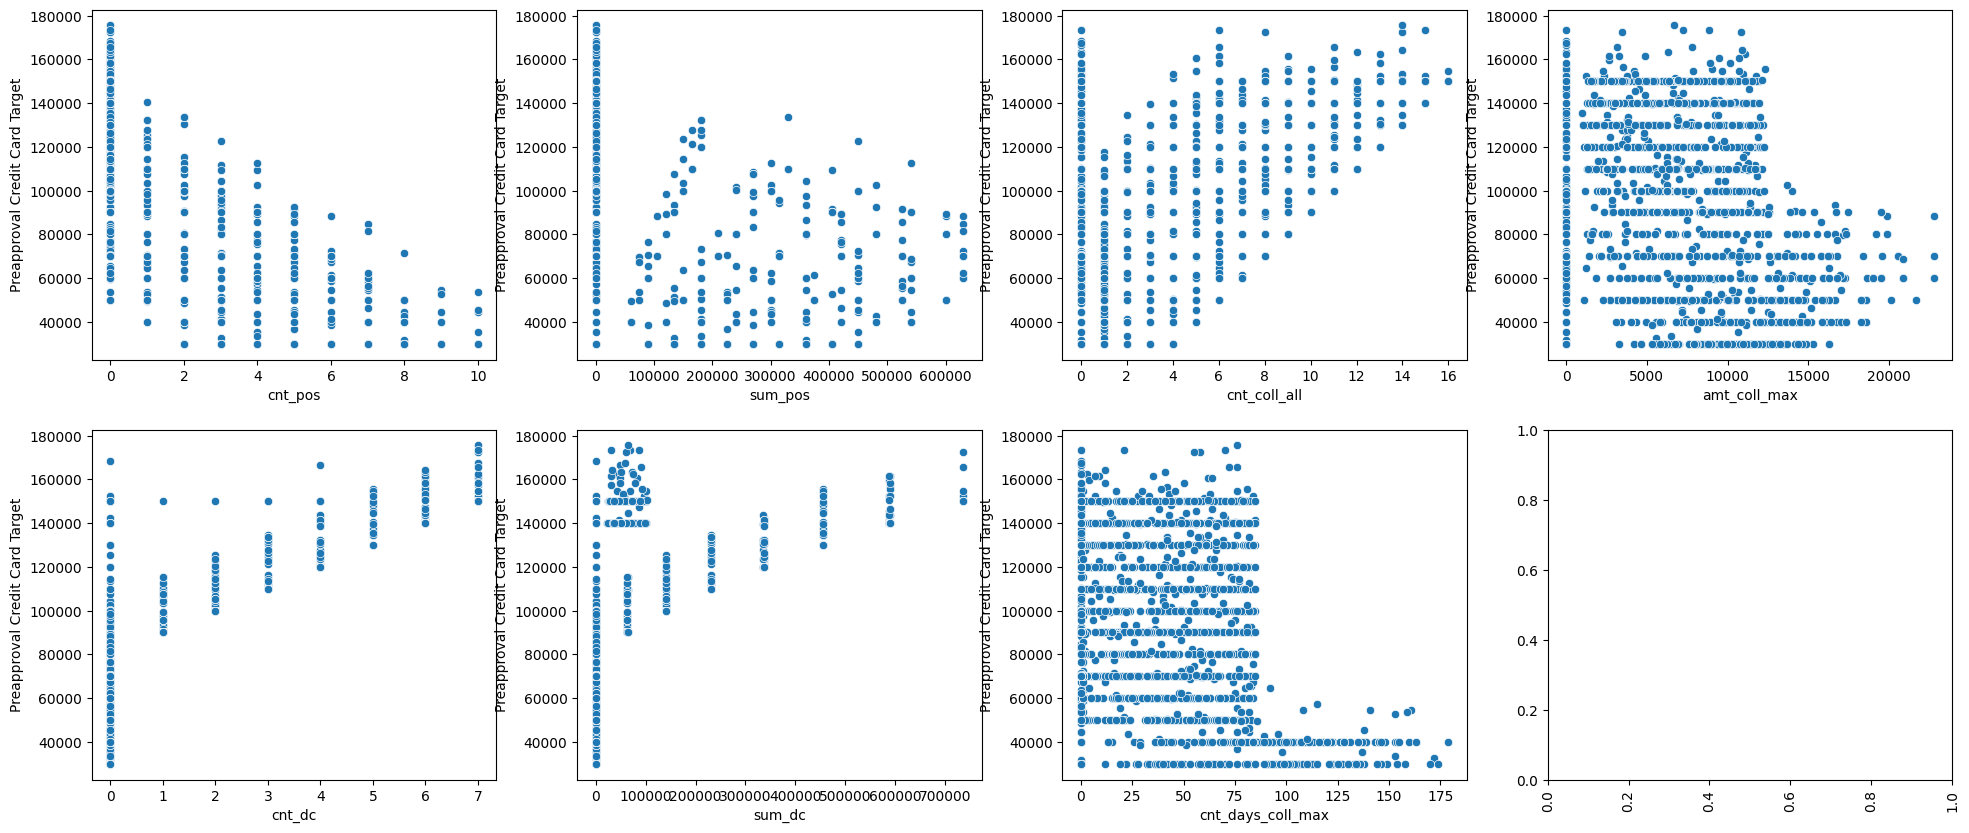

In [ ]:
fig, axs = plt.subplots(2, 4, figsize=(24, 10))

# График 1
sns.scatterplot(x='cnt_pos', y='preapp_cc_target', data=df, ax=axs[0, 0])
axs[0, 0].set_xlabel('cnt_pos')
axs[0, 0].set_ylabel('Preapproval Credit Card Target')

# График 2
sns.scatterplot(x='sum_pos', y='preapp_cc_target', data=df, ax=axs[0, 1])
axs[0, 1].set_xlabel('sum_pos')
axs[0, 1].set_ylabel('Preapproval Credit Card Target')

# График 3
sns.scatterplot(x='cnt_dc', y='preapp_cc_target', data=df, ax=axs[1, 0])
axs[1, 0].set_xlabel('cnt_dc')
axs[1, 0].set_ylabel('Preapproval Credit Card Target')

# График 4
sns.scatterplot(x='sum_dc', y='preapp_cc_target', data=df, ax=axs[1, 1])
axs[1, 1].set_xlabel('sum_dc')
axs[1, 1].set_ylabel('Preapproval Credit Card Target')
plt.xticks(rotation=90)

# График 5
sns.scatterplot(x='cnt_coll_all', y='preapp_cc_target', data=df, ax=axs[0, 2])
axs[0, 2].set_xlabel('cnt_coll_all')
axs[0, 2].set_ylabel('Preapproval Credit Card Target')

# График 6
sns.scatterplot(x='cnt_days_coll_max', y='preapp_cc_target', data=df, ax=axs[1, 2])
axs[1, 2].set_xlabel('cnt_days_coll_max')
axs[1, 2].set_ylabel('Preapproval Credit Card Target')

# График 7
sns.scatterplot(x='amt_coll_max', y='preapp_cc_target', data=df, ax=axs[0, 3])
axs[0, 3].set_xlabel('amt_coll_max')
axs[0, 3].set_ylabel('Preapproval Credit Card Target')

plt.show()


In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X = df[['cnt_pos', 'sum_pos', 'cnt_cc', 'sum_cc', 'cnt_dc', 'sum_dc', 'cnt_coll_all', 'cnt_days_coll_max', 'amt_coll_max']]
y = df['preapp_cc_target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print('Среднеквадратичная ошибка:', mse)
print('Коэффициент детерминации (R^2):', r2)
print('Коэффициенты линейной регрессии:')
for i, coef in enumerate(model.coef_):
    print(f'Коэффициент {i+1}: {coef}')
print('Свободный член (intercept):', model.intercept_)
print('\nЧем ближе значение R^2 к 1, тем лучше модель объясняет изменчивость данных. \nТаким образом, значение R^2 равное 0.8933 говорит о том, что модель линейной регрессии хорошо соответствует данным и объясняет большую часть вариации зависимой переменной.')
print('Каждый коэффициент показывает величину влияния соответствующего предиктора на зависимую переменную, при условии, что остальные переменные остаются постоянными.')

Среднеквадратичная ошибка: 160168877.54307064
Коэффициент детерминации (R^2): 0.8933301859688837
Коэффициенты линейной регрессии:
Коэффициент 1: -4921.076381408759
Коэффициент 2: 0.034019287967880875
Коэффициент 3: -5641.361530136405
Коэффициент 4: 0.05659901548768912
Коэффициент 5: 9968.226318635438
Коэффициент 6: 0.0007228418277911708
Коэффициент 7: 643.7906500239698
Коэффициент 8: -66.1082172497572
Коэффициент 9: 0.2301981954766315
Свободный член (intercept): 79168.55643733291

Чем ближе значение R^2 к 1, тем лучше модель объясняет изменчивость данных. 
Таким образом, значение R^2 равное 0.8933 говорит о том, что модель линейной регрессии хорошо соответствует данным и объясняет большую часть вариации зависимой переменной.
Каждый коэффициент показывает величину влияния соответствующего предиктора на зависимую переменную, при условии, что остальные переменные остаются постоянными.


<Axes: >

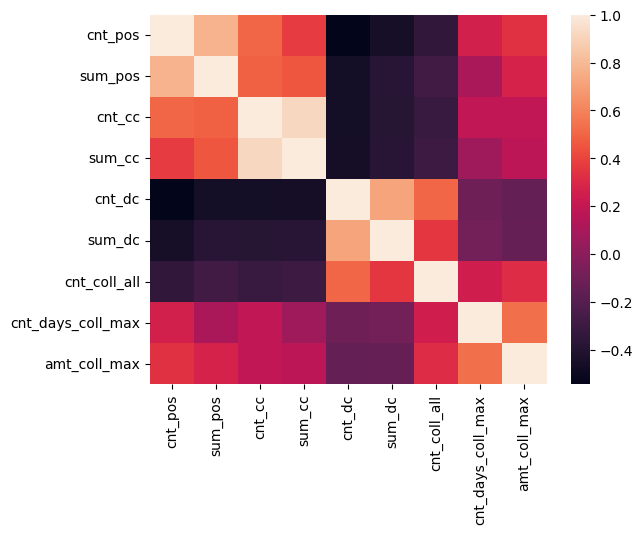

In [ ]:
print('Посмотрим на корреляцию параметров между собой')

sns.heatmap(df.drop('preapp_cc_target', axis=1).corr())

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm


print('Мультиколлинеарность данных:')
X = df.drop('preapp_cc_target', axis=1)
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data["Tolerance"] = 1 / vif_data["VIF"]

print(vif_data)

y = df['preapp_cc_target']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
residuals = model.resid
durb_watson = sm.stats.stattools.durbin_watson(residuals)

print("\nСтатистика Дарбина-Уотсона:", durb_watson)
print('Значение около 2 указывает на отсутствие автокорреляции')

Мультиколлинеарность данных:
             feature        VIF  Tolerance
0            cnt_pos   5.290360   0.189023
1            sum_pos   4.081872   0.244986
2             cnt_cc  11.834585   0.084498
3             sum_cc  10.659693   0.093811
4             cnt_dc   4.116279   0.242938
5             sum_dc   3.070049   0.325728
6       cnt_coll_all   3.554473   0.281336
7  cnt_days_coll_max   3.213643   0.311173
8       amt_coll_max   4.102070   0.243779

Статистика Дарбина-Уотсона: 2.0229809505393503
Значение около 2 указывает на отсутствие автокорреляции


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_normalized = pd.DataFrame()
df_normalized[df.columns] = scaler.fit_transform(df)

print("\nНормализованные данные:")
print(df_normalized.head())

threshold = 5 #это пороговое значение для VIF
vif = vif_data[["VIF", 'feature']]
high_vif_features = vif[vif['VIF'] > threshold]['feature'].tolist()
df_final = df.drop(high_vif_features, axis=1)




Нормализованные данные:
   preapp_cc_target  cnt_pos  sum_pos  cnt_cc    sum_cc    cnt_dc    sum_dc  \
0          0.137457      0.5  0.00000     0.0  0.000000  0.000000  0.000000   
1          0.549828      0.0  0.00000     0.0  0.000000  0.428571  0.315104   
2          0.343643      0.0  0.00000     0.5  0.952381  0.000000  0.000000   
3          0.481100      0.2  0.47619     0.0  0.000000  0.285714  0.191169   
4          0.824742      0.0  0.00000     0.0  0.000000  1.000000  0.084585   

   cnt_coll_all  cnt_days_coll_max  amt_coll_max  
0        0.0625           0.117318      0.544879  
1        0.7500           0.184358      0.361714  
2        0.5625           0.117318      0.402945  
3        0.0000           0.000000      0.000000  
4        0.8750           0.061453      0.457978  


,preapp_cc_target,sum_pos,cnt_dc,sum_dc,cnt_coll_all,cnt_days_coll_max,amt_coll_max
0,50000,0,0,0.0,1,21,12396
1,110000,0,3,231904.0,12,33,8229
2,80000,0,0,0.0,9,21,9167
3,100000,300000,2,140693.0,0,0,0
4,150000,0,7,62251.0,14,11,10419


In [ ]:
X = df_final.drop('preapp_cc_target', axis=1)
y = df_final['preapp_cc_target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print('Среднеквадратичная ошибка:', mse)
print('Коэффициент детерминации (R^2):', r2)
print('Коэффициенты линейной регрессии:')
for i, coef in enumerate(model.coef_):
    print(f'Коэффициент {i+1}: {coef}')
print('Свободный член (intercept):', model.intercept_)
print('\nЧем ближе значение R^2 к 1, тем лучше модель объясняет изменчивость данных')
print('Модель стала хуже')

Среднеквадратичная ошибка: 275727466.35530525
Коэффициент детерминации (R^2): 0.8163700838105566
Коэффициенты линейной регрессии:
Коэффициент 1: -0.02159535645412132
Коэффициент 2: 10705.053759319931
Коэффициент 3: 0.007349086066824384
Коэффициент 4: 1549.463747698317
Коэффициент 5: -180.72283011051294
Коэффициент 6: -0.019449509490868877
Свободный член (intercept): 72887.41761656827

Чем ближе значение R^2 к 1, тем лучше модель объясняет изменчивость данных


Для анализа также могут быть полезны следующие параметры:


*   Доход клиента
*   История платежей
*   Трудовой стаж и стабильность работы
*   Семейное положение (наличие детей, которых надо содержать, и тд)

